<a href="https://colab.research.google.com/github/Tamerly/Data_analisys_learning/blob/main/Stepik_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

cell below should be run every time, when you want to work with dataset

In [ ]:
! gdown --id 13O3cHY8AbJD1IH3HtZY0jZDkEVQoDNPR

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=13O3cHY8AbJD1IH3HtZY0jZDkEVQoDNPR
To: /content/2_taxi_nyc.csv
100% 2.48M/2.48M [00:00<00:00, 123MB/s]


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/2_taxi_nyc.csv')

In [ ]:
df.shape

(29101, 14)

In [ ]:
df.dtypes

pickup_dt        object
pickup_month     object
borough          object
pickups           int64
hday             object
spd             float64
vsb             float64
temp            float64
dewp            float64
slp             float64
pcp 01          float64
pcp 06          float64
pcp 24          float64
sd              float64
dtype: object

In [ ]:
df.head(5)

,pickup_dt,pickup_month,borough,pickups,hday,spd,vsb,temp,dewp,slp,pcp 01,pcp 06,pcp 24,sd
0,2015-01-01 01:00:00,Jan,Bronx,152,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
1,2015-01-01 01:00:00,Jan,Brooklyn,1519,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
2,2015-01-01 01:00:00,Jan,EWR,0,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
3,2015-01-01 01:00:00,Jan,Manhattan,5258,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
4,2015-01-01 01:00:00,Jan,Queens,405,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0


In [ ]:
df = df.rename(columns={
    'pcp 01': 'pcp_01',
    'pcp 06': 'pcp_06',
    'pcp 24': 'pcp_24',
})

In [ ]:
df.head(3)

,pickup_dt,pickup_month,borough,pickups,hday,spd,vsb,temp,dewp,slp,pcp_01,pcp_06,pcp_24,sd
0,2015-01-01 01:00:00,Jan,Bronx,152,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
1,2015-01-01 01:00:00,Jan,Brooklyn,1519,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
2,2015-01-01 01:00:00,Jan,EWR,0,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0


In [ ]:
df.query("borough == 'Manhattan'").shape[0]

4343

In [ ]:
df['borough'].value_counts()

Bronx            4343
Brooklyn         4343
EWR              4343
Manhattan        4343
Queens           4343
Staten Island    4343
Name: borough, dtype: int64

In [ ]:
df_borough = df.groupby('borough').agg({'pickups': 'sum'}).idxmin()
df_borough

pickups    EWR
dtype: object

In [ ]:
df.groupby('borough').agg({'pickups':'sum'})

,pickups
borough,
Bronx,220047
Brooklyn,2321035
EWR,105
Manhattan,10367841
Queens,1343528
Staten Island,6957


In [ ]:
df_borough_in_hdays = df.groupby(['borough', 'hday']).agg({'pickups': 'mean'}).reset_index()

In [ ]:
df_borough_in_hdays

,borough,hday,pickups
0,Bronx,N,50.771073
1,Bronx,Y,48.065868
2,Brooklyn,N,534.727969
3,Brooklyn,Y,527.011976
4,EWR,N,0.023467
5,EWR,Y,0.041916
6,Manhattan,N,2401.302921
7,Manhattan,Y,2035.928144
8,Queens,N,308.899904
9,Queens,Y,320.730539


In [ ]:
import matplotlib.pyplot as plt

<Axes: xlabel='borough'>

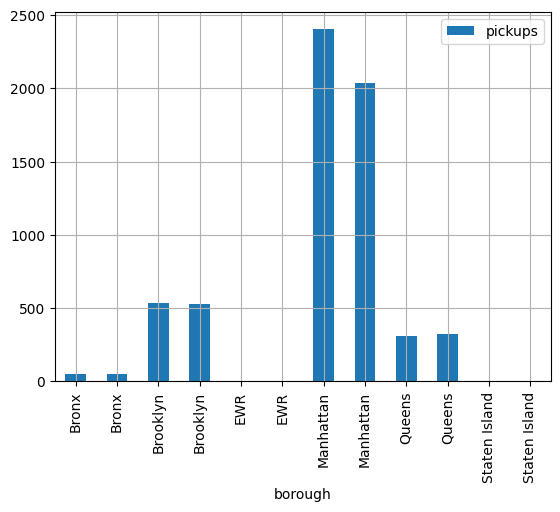

In [ ]:
df_borough_in_hdays.plot(x="borough",
                         y="pickups",
                         kind="bar",
                         legend=True,
                         grid=True
                         )

In [ ]:
df.head(5)

,pickup_dt,pickup_month,borough,pickups,hday,spd,vsb,temp,dewp,slp,pcp 01,pcp 06,pcp 24,sd
0,2015-01-01 01:00:00,Jan,Bronx,152,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
1,2015-01-01 01:00:00,Jan,Brooklyn,1519,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
2,2015-01-01 01:00:00,Jan,EWR,0,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
3,2015-01-01 01:00:00,Jan,Manhattan,5258,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
4,2015-01-01 01:00:00,Jan,Queens,405,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0


In [ ]:
pickups_by_mon_bor=df.groupby(['pickup_month', 'borough', ]).agg({'pickups': 'sum'}).reset_index()
pickups_by_mon_bor

In [ ]:
pivot = pickups_by_mon_bor.pivot_table(
    index=pickups_by_mon_bor['pickup_month'],
    columns='borough',
    values='pickups'
    )

In [ ]:
pivot

In [ ]:
work_space = df.groupby(['pickup_month', 'borough', ]).agg({'pickups': 'sum'}).reset_index()

In [ ]:
pickups_by_mon_bor = df.groupby(['pickup_month', 'borough', ]).agg({'pickups': 'sum'}).sort_values('pickups', ascending=False)
pickups_by_mon_bor.reset_index().shape

(36, 3)

In [ ]:
df.head(3)

,pickup_dt,pickup_month,borough,pickups,hday,spd,vsb,temp,dewp,slp,pcp 01,pcp 06,pcp 24,sd
0,2015-01-01 01:00:00,Jan,Bronx,152,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
1,2015-01-01 01:00:00,Jan,Brooklyn,1519,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
2,2015-01-01 01:00:00,Jan,EWR,0,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0


In [ ]:
def temp_to_celcius(column):
    result = (column - 32) * 5/9
    return result

In [ ]:
df['temp'][:5]

0    30.0
1    30.0
2    30.0
3    30.0
4    30.0
Name: temp, dtype: float64

In [ ]:
df['temp_c'] = temp_to_celcius(df['temp'])
type(df['temp_c'][:5])

pandas.core.series.Series